# Customer Churn Analysis
#### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#to see all the columns
pd.set_option('display.max_columns',None)

In [3]:
#reading csv and storing it in df
#using double slash because of unicode error
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### checking nulls

In [4]:
df.isnull().sum().sum()

0

dataset has no null values

#### checking for empty spaces

In [5]:
a=[]
for i in df.columns:
    pos=np.where(df[i]==' ');
    a.append(pos)


In [6]:
a

[(array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
        dtype=int64),),
 (array([], dtype=int64),)]

In [7]:
df.loc[a[-2]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


empty space present in TotalCharges

#### replacing empty space with nan value

In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)


#### checking datatype

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- dataset has object and int datatypes
- Total charges is numerical datatype but showing as object datatype, need to rectify this error
- total charges needs to be imputed

In [10]:
# converting the object data type into float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype


dtype('float64')

#### Imputing

In [11]:
#Replacing null values of TotalCharges column with it's mean, this is becasue we dont know have the exact tarif details for the plans opted by the customers
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

#### Checking for unique values in each columns

In [12]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

- customerID has all its data unique so its for identification purpose dropping this column

In [13]:
# dropping customerID columns
df.drop(['customerID'],inplace=True,axis=1)

#### check for duplicates

In [14]:
df.duplicated().sum()

22

In [15]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
df.shape

(7021, 20)

#### seperating numerical and categorical data type

In [16]:
numericalCol=df.select_dtypes(include=np.number).columns
print("The numerical columns are:",numericalCol)
print('\n')
objectColumns=df.select_dtypes(include=np.object).columns
print("The categorical columns are:",objectColumns)

The numerical columns are: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


The categorical columns are: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


#### seperating  numerical columns into two categories discrete and continuous

In [17]:
discretecols=[]
continuecols=[]

for column in numericalCol:
     if df[column].nunique()>50:
        continuecols.append(column)
     
     else:
        discretecols.append(column)
        
print("The discrete columns are:",discretecols)
print('\n')
print("The continuous columns are:",continuecols)  

The discrete columns are: ['SeniorCitizen']


The continuous columns are: ['tenure', 'MonthlyCharges', 'TotalCharges']


#### checking how the data is defined statistically for numerical continuous datas and visualising

In [18]:
df[continuecols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2290.342338,2265.044153,18.80,411.15,1410.25,3801.7,8684.80


- tenure
    - mean to std is 1.32
    - min tenure is 0 and max is 72, difference between quantile is not uniform
    - tenure 0 could imply newly aquired customer
    - customer retention is good as the avg tenure is 32.4
    
    
-  MonthlyCharges
    - mean to std is 2.16
    - min monthly charge is 18.25 to max of 118.25, on an avg the company get 64.8 from a customer
    - difference between each quantile is not uniform
    
    
-  TotalCharges
    - mean to std is 1.01
    - min total charge is 18.8 to max 8684.8, on avg the company gets 2290.3 from a customer
    - total charge is monthly charges + other options customers have opted for
    - difference between each quantile is not uniform


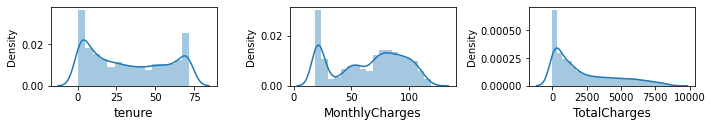

In [19]:
# plotting distribution graph 
j=0
plt.figure(figsize=(10,10))
for column in df[continuecols]:
    plt.subplot(6,3,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- tenure
    - not uniformly distributed
    - more than one mode is present
    - skewness is present
    - company is able to get new customer as there is surge at tenure 0
    - company has many loyal customers as there is surge at tenure 72
    
    
- MonthlyCharges
    - not uniformly distributed
    - skewness is present
    - can be divided into 3 category
        - category 1 (18.2 to 30) - moderate of the customers opted for plans to get least monthly charges    
        - category 2 (31 to 70) - least no of customers belong in this range can provide more plans here
        - category 3 (71 to 120) - most no.of customers belong to this group, could imply that it provides lots of service in these packs
        
        
- TotalCharges
    - not uniformly distributed
    - positivey skewed
    - presence of outliers
    - very less customers are willing to pay more than 2500 for their total charges

#### checking how the data is defined statistically for numerical discrete datas and visualising

In [20]:
df[discretecols].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.0,0.0,0.0,0.0,1.0


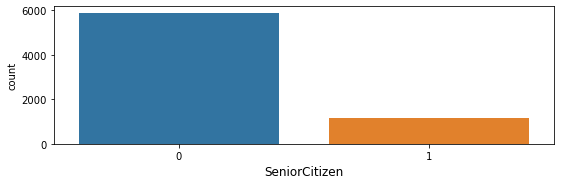

In [21]:
# plotting countplot graph 
j=0
plt.figure(figsize=(15,25))
for column in df[discretecols]:
    plt.subplot(10,2,j+1)
    sns.countplot(df[column],)
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()




- most of the customers are not senior citizen


#### checking how the data is defined statistically for categorical datas`and visualising

In [22]:
df[objectColumns].describe(include=['O'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3541,3619,4911,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359,5164


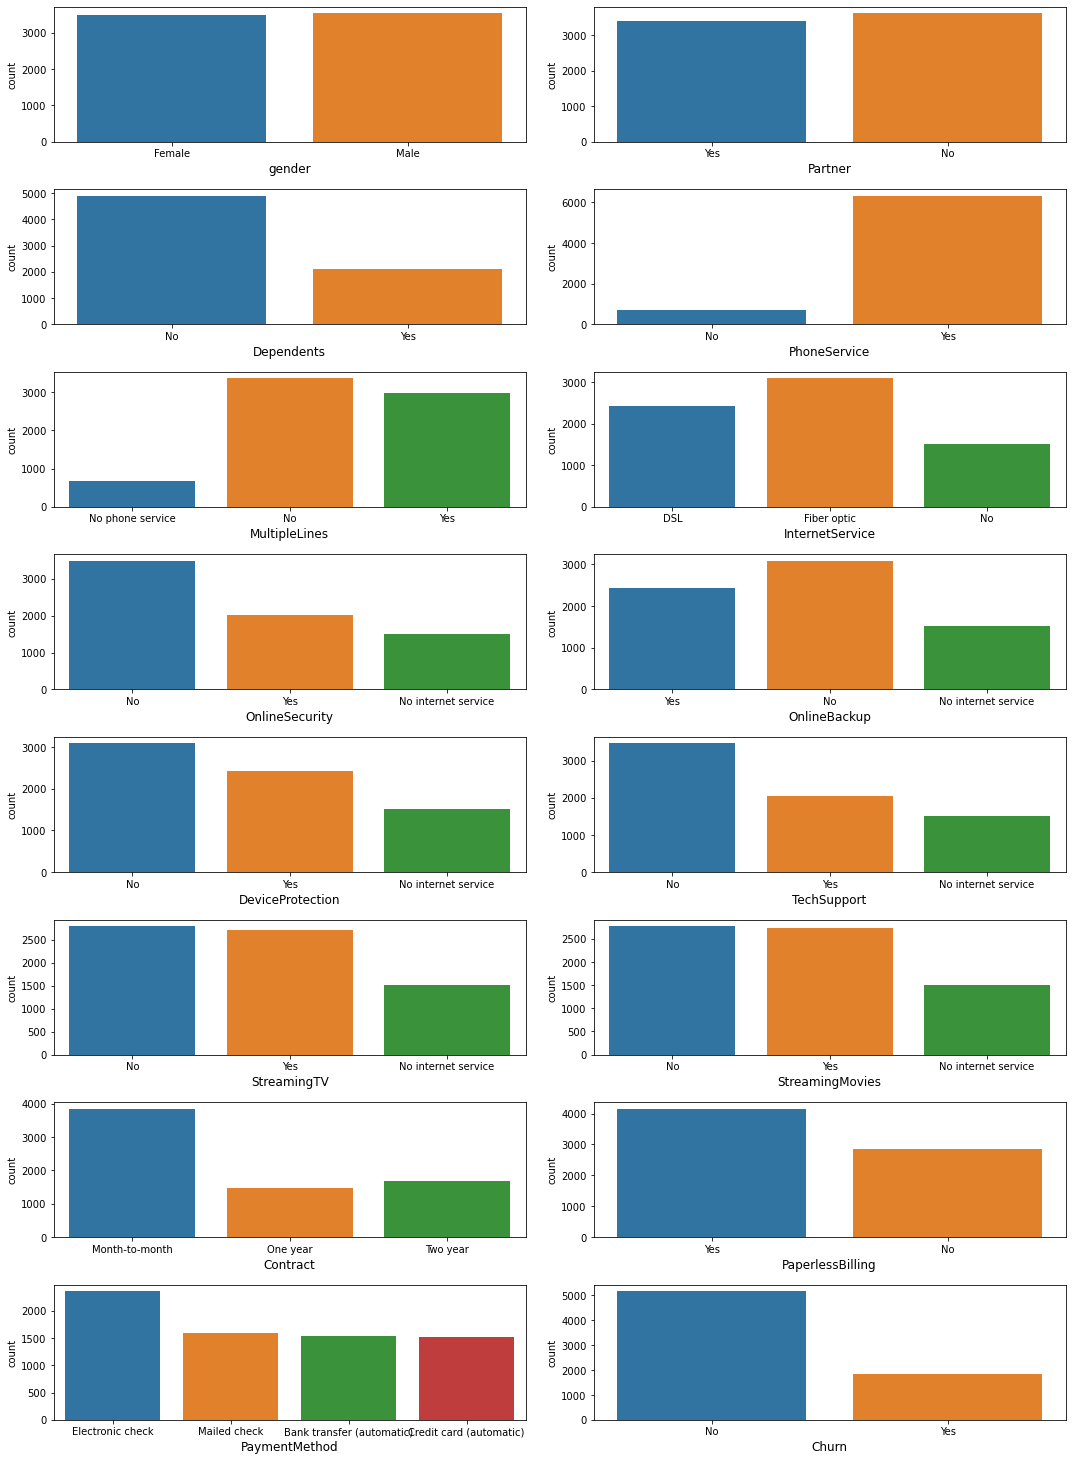

In [23]:
# plotting countplot graph 
j=0
plt.figure(figsize=(15,25))
for column in df[objectColumns]:
    plt.subplot(10,2,j+1)
    sns.countplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()



- gender
	- equal distribution of gender among the customers


- Partner
	- almost equal distribution among the customers who opted and didnt opt be partner


- Dependents
	- most of the customers are not dependent on anyone


- PhoneService
	- most of the customers have opted for phone service


- MultipleLines
	- most of the customers have not opted for multiple lines


- InternetService
	- most of the customers have opted for fiber optics, very few have opted out for internet service


- OnlineSecurity
	- most of the customers have not opted for online security


- OnlineBackup
	- most of the customers have not opted for Online Backup


- Device Protection
	- most of the customers have not opted for device protection


- Tech Support
	- most of the customers have not opted for Tech support


- StreamingTV
	- most of the customers have not opted for streaming tv service (combining the effect of no and no internet service, as they cant opt for it )
 

- StreamingMovies
	- most of the customers have not opted for streaming movie service (combining the effect of no and no internet service, as they cant opt for it )


- Contract
	- most of the customers prefer to opt month-to-month offer
		- this could be because the customers feel burdened to pay lumsump amount of money
		- the difference in premium when calculating it on month-to- month and one year or two year could be not very high 
		- the offers provided maynot be very attractive and services provided maynot be enough


- PaperlessBilling
	- the customers prefer paperless billing, as they feel they could contribute to the society as they are not wasting paper unwantedly


- PaymentMethod
	- most of the customers use online check for their payment


- Churn
	- the churning rate is very low


- additional observation 
	- the reason most of the features are not opted is because the target customers are young and the mindset is to save the amount as much as possible, this makes them look for alternative that could provide the same for cheaper rate


	
 

#### Bivariate Analysis

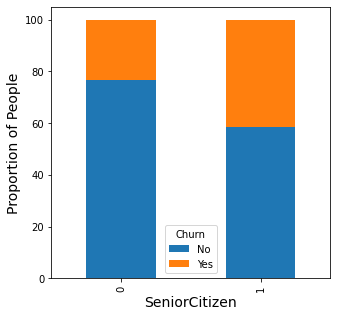

In [24]:
table_SeniorCitizen = pd.crosstab(df['SeniorCitizen'], df['Churn'])
(table_SeniorCitizen.div(table_SeniorCitizen.sum(axis = 1),axis = 0)*100).sort_values(by = 'Yes').plot(kind = 'bar',stacked = True,figsize = (5,5));
plt.xlabel('SeniorCitizen',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


- churn rate is more for senior citizen
- company is more focused on retaining younger generation

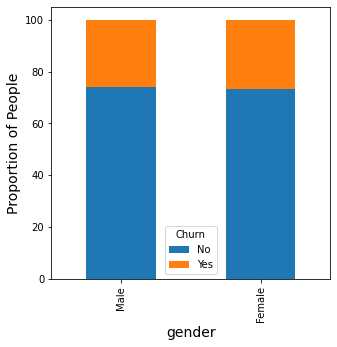

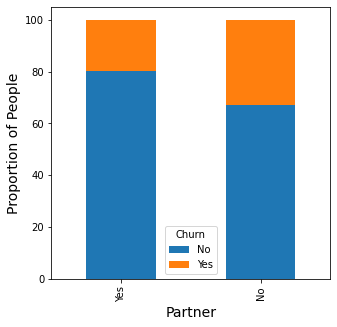

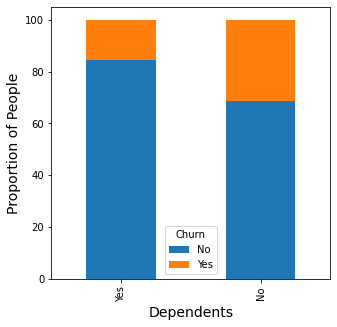

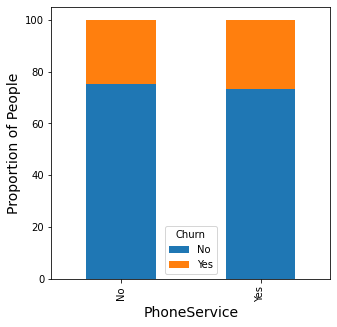

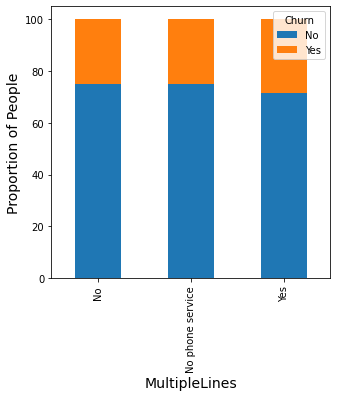

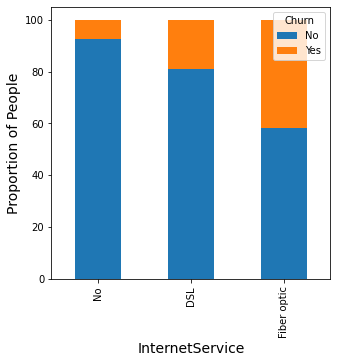

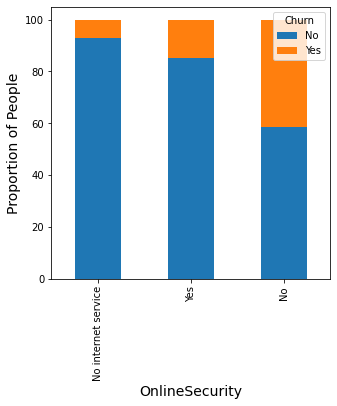

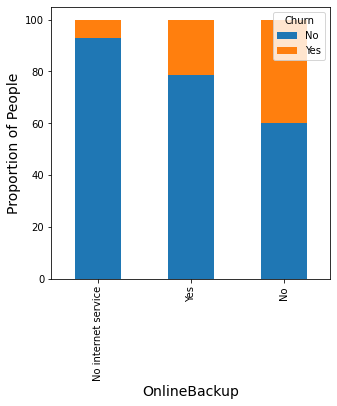

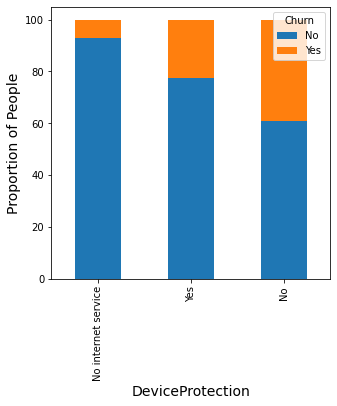

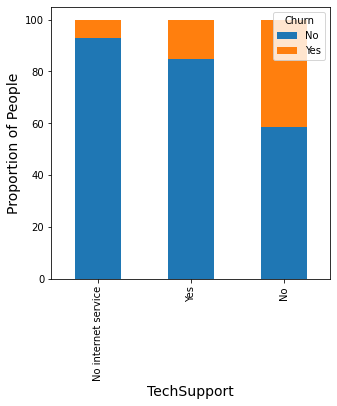

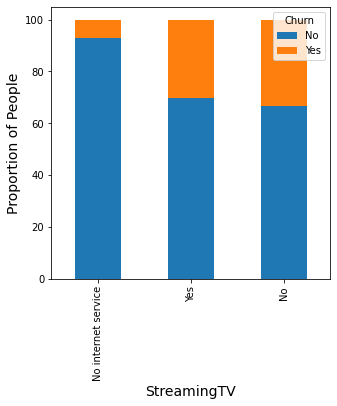

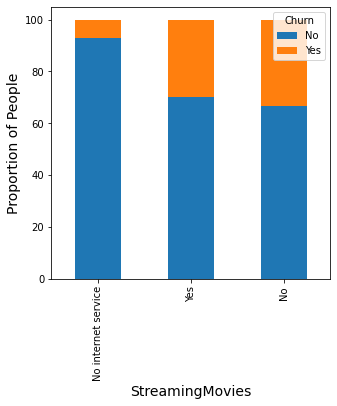

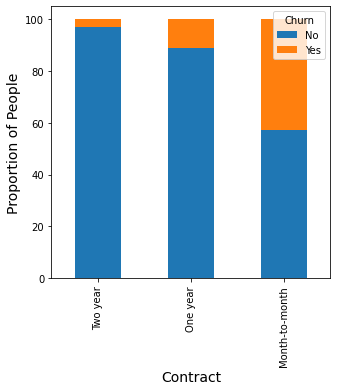

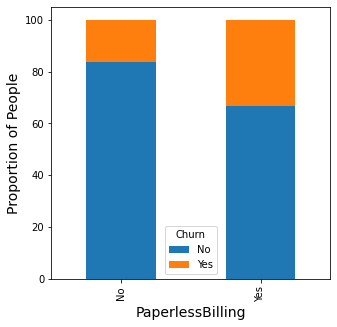

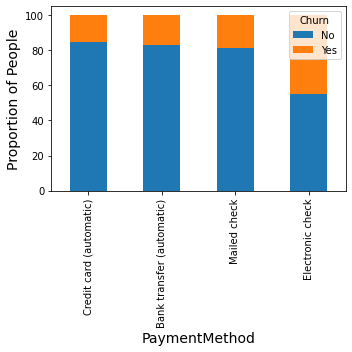

In [25]:
j=0
for column in df[objectColumns[:-1]]:
    table_SeniorCitizen = pd.crosstab(df[column], df['Churn'])
    (table_SeniorCitizen.div(table_SeniorCitizen.sum(axis = 1),axis = 0)*100).sort_values(by = 'Yes').plot(kind = 'bar',stacked = True,figsize = (5,5));
    plt.xlabel(column,fontsize = 14);
    plt.ylabel('Proportion of People',fontsize = 14);
    j+=1
plt.tight_layout()    

- gender
	- the churn rate is same for both sex


- Partner	
	- churn rate is higher for those who are not partner


- Dependents
	- churn rate is higher for those who are not dependent


- PhoneService
	- churn rate is same regardless of the choice opted


- MultipleLines
	- churn rate is higher for those who have opted yes for multiple lines


- InternetService
	- churn rate is higher for those who opted fiber optic internet service


- OnlineSecurity
	- churn rate is higher for those who opted no for online security


- OnlineBackup
	- churn rate is higher for those who opted no for online backup


- DeviceProtection
	- churn rate is higher for those who opted no for Device protection


- TechSupport
	- churn rate is higher for those who opted no for Tech Support


- StreamingTV
	- churn rate is higher for those who opted no for streaming


- StreamingMovies
	- churn rate is higher for those who opted no for streaming movies


- Contract
	churn rate is higher for those who opted month-to-month contract


- PaperlessBilling
	- churn rate is higher for those who opted yes for paperless billing


- PaymentMethod
	- churn rate is higher for those who opted for electronic check 



 

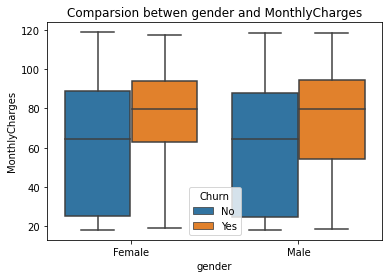

In [26]:
# comparing gender and monthlycharges
plt.title("Comparsion betwen gender and MonthlyCharges")
sns.boxplot(x= "gender",y="MonthlyCharges", data = df,hue="Churn")
plt.show()

- male and female both has higher churning rate for those who have monthly bill in the range 55-90

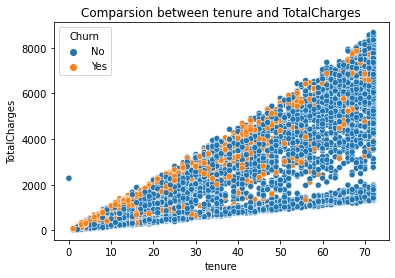

In [27]:
# comparing tenure and TotalCharges
plt.title("Comparsion between tenure and TotalCharges")
sns.scatterplot(x= "tenure",y= "TotalCharges", data = df,hue="Churn")
plt.show()

- as the tenure increases the total charge increased, causing increase in churn rate

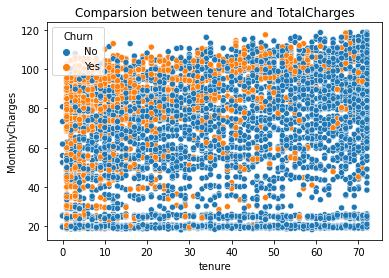

In [28]:
# comparing tenure and TotalCharges
plt.title("Comparsion between tenure and MonthlyCharges")
sns.scatterplot(x= "tenure",y= "MonthlyCharges", data = df,hue="Churn")
plt.show()

- as the tenure increased those customers who pay less or moderate monthly charge are retained and those who pay high amount are very likely to be churned

SeniorCitizen     0    1
gender                  
Female         2913  567
Male           2967  574


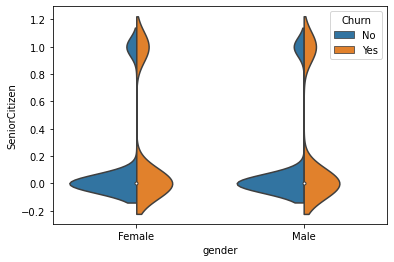

In [79]:
sns.violinplot(x='gender',y='SeniorCitizen',data=df,hue="Churn",split=True);

- senior citizen  have higher chance to churn


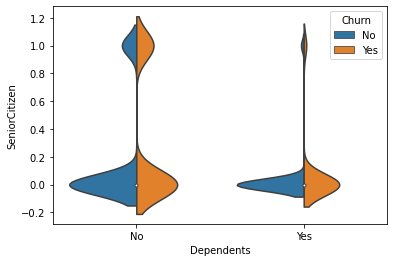

In [80]:
# comparing SeniorCitizen with dependents
sns.violinplot(x='Dependents',y='SeniorCitizen',data=df,hue="Churn",split=True)
plt.show()

- senior citizen without any dependets have high chance to churn
- churning rate is higher for those who are dependents

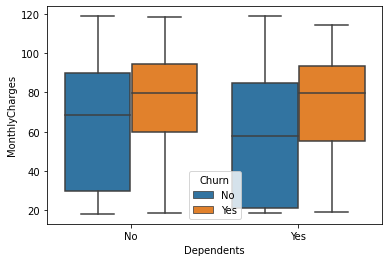

In [31]:
# checking  monthlycharges with dependents
sns.boxplot(x='Dependents',y='MonthlyCharges',data=df,hue="Churn");

- regardless of the option selected, churning rate is higher for those customers having higher monthly charges
- Customers who have no dependents having higher monthly charges  have chance to churn

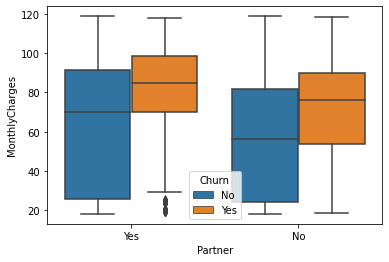

In [30]:
sns.boxplot(x='Partner',y='MonthlyCharges',data=df,hue="Churn");

- regardless of the option selected, churning rate is higher for those customers having higher monthly charges
- Customers who have no partners are  having higher monthly charges  have chance to churn

#### check skewness

In [41]:
df.skew()[continuecols].sort_values()

MonthlyCharges   -0.224097
tenure            0.235542
TotalCharges      0.959088
dtype: float64

skewness is not within limits for TotalCharges

#### using power transform to transform

In [42]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [43]:
df[['TotalCharges']] = scaler.fit_transform(df[['TotalCharges']].values)

In [44]:
#Checking skewness
df[['TotalCharges']].skew()

TotalCharges   -0.143822
dtype: float64

skewness is within limits ( -0.65 to 0.65 )

#### Encoding

In [45]:
# tranform Churn into 0 for No and 1 for Yes
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [46]:
# using ordinal encoding for other object data types
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= oe.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.821579,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.248197,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.397518,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.227054,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.260061,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,0.290738,0
7017,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,1.567717,0
7018,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.868826,0
7019,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.932072,1


#### checking correlation

In [47]:
continuecols=[]
numericalCol=df.select_dtypes(include=np.number).columns
for column in numericalCol:
     if df[column].nunique()>50:
        continuecols.append(column)
continuecols.append('Churn')        

In [48]:
df[continuecols].corr()["Churn"].sort_values()

tenure           -0.351508
TotalCharges     -0.235704
MonthlyCharges    0.194508
Churn             1.000000
Name: Churn, dtype: float64

#### plotting heatmap to see the correlation

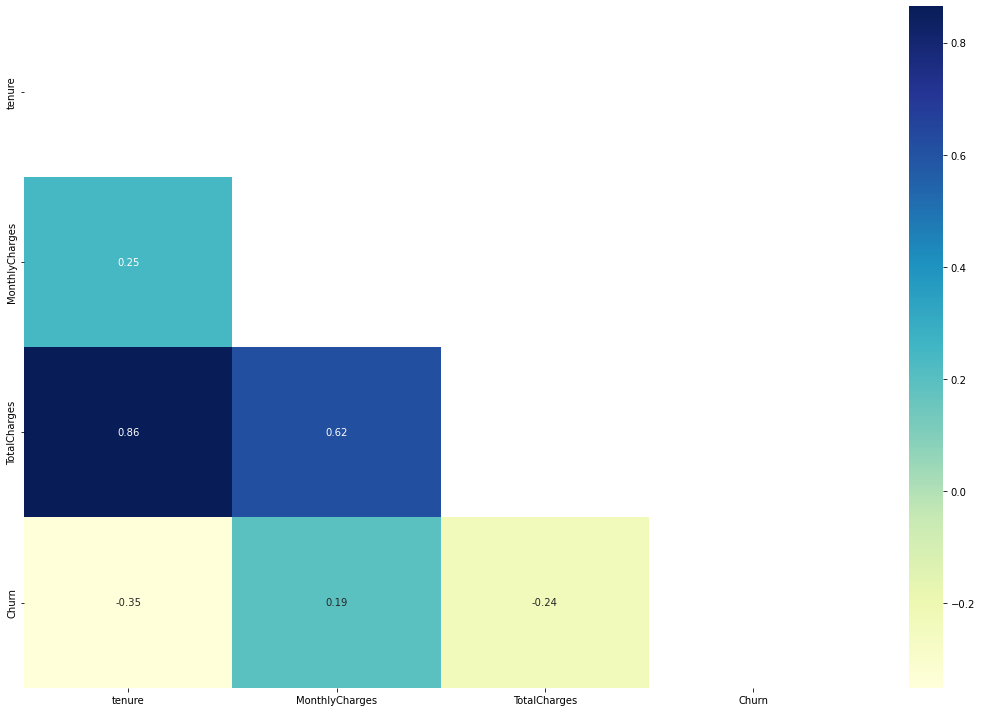

In [49]:
# visualization of correlation relationships
plt.figure(figsize=(15, 10))
mask = np.triu(df[continuecols].corr())
sns.heatmap(df[continuecols].corr(),cmap="YlGnBu",annot = True, fmt = '.2f',mask = mask)
plt.tight_layout()


- Total charge and tenure are highly correlated
- total charge and monthly charge are highly correlated

#### Checking for multicollinearity by using vif

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df[continuecols].drop('Churn',axis=1)
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
2,12.752159,TotalCharges
0,8.415374,tenure
1,3.422407,MonthlyCharges


 value of total charge exceed the limits of vif 

#### dropping total charge and looking for vif 

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df[continuecols].drop(['Churn','TotalCharges'],axis=1)
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
0,1.063997,tenure
1,1.063997,MonthlyCharges


vif is within limits less than 10

#### dropping total charge from dataset

In [52]:
# dropping TotalCharges columns
df.drop(['TotalCharges'],inplace=True,axis=1)

#### Outliers check

In [53]:
numericalCol=['SeniorCitizen', 'tenure', 'MonthlyCharges']

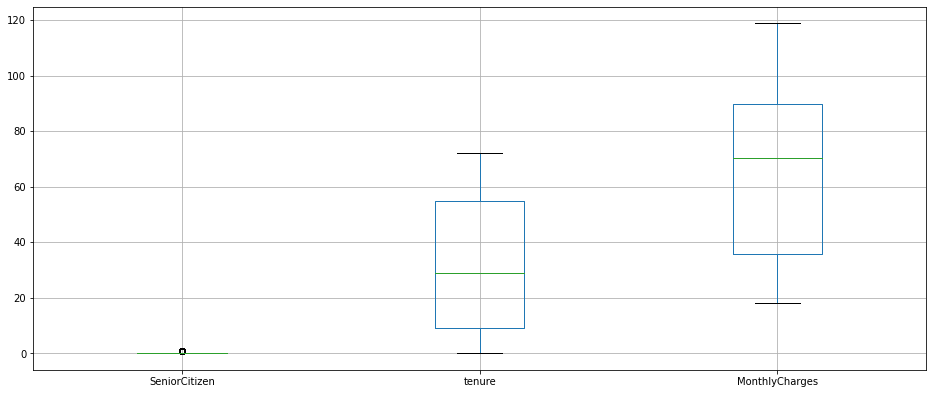

In [54]:
# visualizing
df[numericalCol].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

outlier maybe present in seniorcitizen

#### using z score for treating

In [55]:
from scipy.stats import zscore
z=np.abs(zscore(df[numericalCol]))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  0.0  %


#### Splitting dataset

In [56]:
X_s=df_x.drop(columns=["Churn"])
Y_s=df_x[["Churn"]]

#### Checking if target is balanced or not

Churn
0        5164
1        1857
dtype: int64


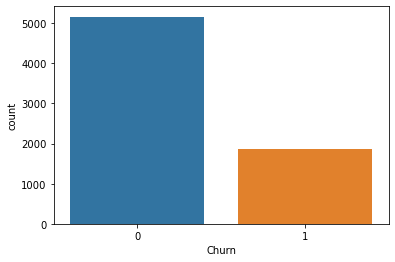

In [57]:
sns.countplot(Y_s['Churn'])
print(Y_s.value_counts())
plt.show()

- ratio of 1 to 0 is 0.35
- needs to be balanced

#### Using SMOTE to balance target

In [58]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from imblearn.over_sampling import SMOTE

In [59]:
# by using smote we are adding data to (Yes) 1 such that the ratio between 1 to 0 becomes 0.75
ove_sm=SMOTE(0.75)
X,Y=ove_sm.fit_resample(X_s,Y_s)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.000000,0,1.000000,0.000000,1,0.0,1.000000,0.0,0.0,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,29.850000
1,1.000000,0,0.000000,0.000000,34,1.0,0.000000,0.0,2.0,0.000000,2.000000,0.0,0.000000,0.000000,1.000000,0.000000,3.000000,56.950000
2,1.000000,0,0.000000,0.000000,2,1.0,0.000000,0.0,2.0,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,3.000000,53.850000
3,1.000000,0,0.000000,0.000000,45,0.0,1.000000,0.0,2.0,0.000000,2.000000,2.0,0.000000,0.000000,1.000000,0.000000,0.000000,42.300000
4,0.000000,0,0.000000,0.000000,2,1.0,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,70.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9032,0.000000,0,0.420743,0.420743,17,1.0,0.841486,1.0,0.0,1.158514,2.000000,0.0,2.000000,0.000000,0.000000,0.579257,2.000000,88.771331
9033,0.436245,0,0.000000,0.000000,3,0.0,1.000000,0.0,2.0,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,2.436245,34.435240
9034,1.000000,0,0.741776,1.000000,11,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.516447,1.483553,0.741776,0.000000,1.258224,54.088980
9035,0.441438,0,0.441438,1.000000,1,1.0,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.558562,2.000000,79.776575


Churn
0        5164
1        3873
dtype: int64


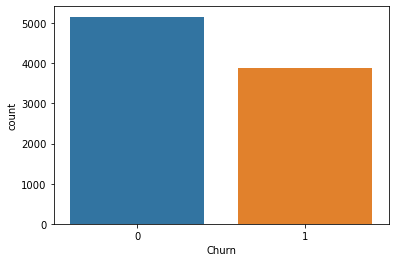

In [60]:
sns.countplot(Y['Churn'])
print(Y.value_counts())
plt.show()

the ratio of yes to no is 0.75, data is balanced

#### Running Algorithm

In [61]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error


from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
A=[]
B=[]
C=[]
D=[]
E=[]
mae=[]

In [62]:
#loop used to find the best random state
def max_aucroc_score(regr,X,Y):
    max_aucroc_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = r_state, test_size=0.20,stratify=Y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        aucroc_scr=(accuracy_score(y_test,y_pred))*100
        print("accuracy score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [63]:
# used to get test accuracy, train accuracy, mse, mae,F1score,confusion matrix,classification report and auc score
def te_t(regr,x_train,x_test,y_train,y_test):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(accuracy_score(y_test,y_te)*100,1)}")
    A.append(round(accuracy_score(y_test,y_te)*100,1))
   
    print(f"train accuracy is {round(accuracy_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))
    
    
    cm = confusion_matrix(y_test, y_te)
    class_label = ["Yes", "No"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print('\n')
    
    print("f1 score is : ",f1_score(y_test,y_te))
    E.append(f1_score(y_test,y_te))
    print('\n')
    
    print("classification report \n",classification_report(y_test,y_te))
   

In [64]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(accuracy_score(y_train,y_tr)*100,1)
    te_ac=round(accuracy_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [65]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
R=max_aucroc_score(reg,X,Y)

accuracy score corresponding to  0  is  77.820796460177
accuracy score corresponding to  1  is  76.16150442477876
accuracy score corresponding to  2  is  77.820796460177
accuracy score corresponding to  3  is  79.20353982300885
accuracy score corresponding to  4  is  77.820796460177
accuracy score corresponding to  5  is  76.9358407079646
accuracy score corresponding to  6  is  77.93141592920354
accuracy score corresponding to  7  is  77.7654867256637
accuracy score corresponding to  8  is  77.26769911504425
accuracy score corresponding to  9  is  78.429203539823
accuracy score corresponding to  10  is  77.87610619469027
accuracy score corresponding to  11  is  78.98230088495575
accuracy score corresponding to  12  is  77.87610619469027
accuracy score corresponding to  13  is  78.4845132743363
accuracy score corresponding to  14  is  77.98672566371681
accuracy score corresponding to  15  is  78.26327433628319
accuracy score corresponding to  16  is  78.4845132743363
accuracy score corr

test accuracy is 78.2
train accuracy is 99.8


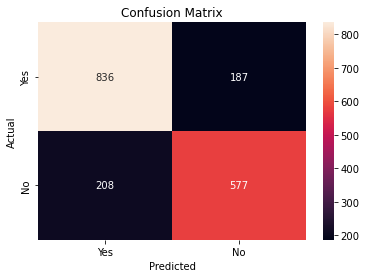



f1 score is :  0.7449967721110394


classification report 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1023
           1       0.76      0.74      0.74       785

    accuracy                           0.78      1808
   macro avg       0.78      0.78      0.78      1808
weighted avg       0.78      0.78      0.78      1808



At cv is 2 cv score is 73.85  
 test accuracy is 78.2 

At cv is 3 cv score is 76.61  
 test accuracy is 78.2 

At cv is 4 cv score is 77.13  
 test accuracy is 78.2 

At cv is 5 cv score is 77.51  
 test accuracy is 78.2 

At cv is 6 cv score is 77.29  
 test accuracy is 78.2 

At cv is 7 cv score is 77.8  
 test accuracy is 78.2 

At cv is 8 cv score is 77.63  
 test accuracy is 78.2 

At cv is 9 cv score is 78.09  
 test accuracy is 78.2 

At cv is 10 cv score is 78.38  
 test accuracy is 78.2 

At cv is 11 cv score is 78.07  
 test accuracy is 78.2 

At cv is 12 cv score is 77.7  
 test accuracy is

In [66]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()
R=max_aucroc_score(rf_c,X,Y)

accuracy score corresponding to  0  is  84.18141592920354
accuracy score corresponding to  1  is  83.01991150442478
accuracy score corresponding to  2  is  83.57300884955751
accuracy score corresponding to  3  is  84.0154867256637
accuracy score corresponding to  4  is  84.23672566371681
accuracy score corresponding to  5  is  83.24115044247787
accuracy score corresponding to  6  is  83.29646017699115
accuracy score corresponding to  7  is  81.96902654867256
accuracy score corresponding to  8  is  83.46238938053098
accuracy score corresponding to  9  is  82.90929203539822
accuracy score corresponding to  10  is  83.96017699115043
accuracy score corresponding to  11  is  83.57300884955751
accuracy score corresponding to  12  is  83.35176991150442
accuracy score corresponding to  13  is  83.51769911504425
accuracy score corresponding to  14  is  83.4070796460177
accuracy score corresponding to  15  is  83.01991150442478
accuracy score corresponding to  16  is  83.29646017699115
accuracy 

test accuracy is 84.5
train accuracy is 99.8


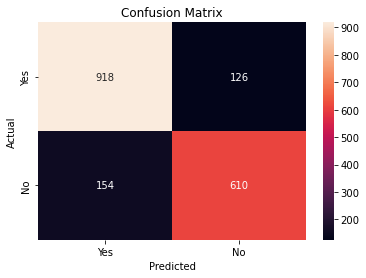



f1 score is :  0.8133333333333334


classification report 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1044
           1       0.83      0.80      0.81       764

    accuracy                           0.85      1808
   macro avg       0.84      0.84      0.84      1808
weighted avg       0.84      0.85      0.84      1808



At cv is 2 cv score is 77.87  
 test accuracy is 84.5 

At cv is 3 cv score is 81.96  
 test accuracy is 84.5 

At cv is 4 cv score is 82.35  
 test accuracy is 84.5 

At cv is 5 cv score is 82.76  
 test accuracy is 84.5 

At cv is 6 cv score is 82.58  
 test accuracy is 84.5 

At cv is 7 cv score is 82.9  
 test accuracy is 84.5 

At cv is 8 cv score is 83.19  
 test accuracy is 84.5 

At cv is 9 cv score is 83.21  
 test accuracy is 84.5 

At cv is 10 cv score is 83.07  
 test accuracy is 84.5 

At cv is 11 cv score is 83.15  
 test accuracy is 84.5 

At cv is 12 cv score is 82.9  
 test accuracy is

In [68]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_c,x2_train,x2_test,y2_train,y2_test)
print('\n')
score(rf_c,x2_train,x2_test,y2_train,y2_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
R=max_aucroc_score(kc,X,Y)

accuracy score corresponding to  0  is  77.48893805309734
accuracy score corresponding to  1  is  77.54424778761062
accuracy score corresponding to  2  is  77.65486725663717
accuracy score corresponding to  3  is  78.09734513274337
accuracy score corresponding to  4  is  77.43362831858407
accuracy score corresponding to  5  is  78.6504424778761
accuracy score corresponding to  6  is  77.820796460177
accuracy score corresponding to  7  is  76.9358407079646
accuracy score corresponding to  8  is  77.65486725663717
accuracy score corresponding to  9  is  77.5995575221239
accuracy score corresponding to  10  is  78.81637168141593
accuracy score corresponding to  11  is  80.25442477876106
accuracy score corresponding to  12  is  77.3783185840708
accuracy score corresponding to  13  is  77.7654867256637
accuracy score corresponding to  14  is  77.26769911504425
accuracy score corresponding to  15  is  77.1570796460177
accuracy score corresponding to  16  is  78.53982300884957
accuracy score 

test accuracy is 77.4
train accuracy is 84.6


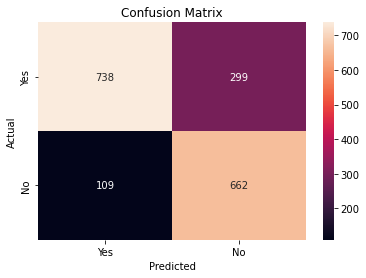



f1 score is :  0.7644341801385682


classification report 
               precision    recall  f1-score   support

           0       0.87      0.71      0.78      1037
           1       0.69      0.86      0.76       771

    accuracy                           0.77      1808
   macro avg       0.78      0.79      0.77      1808
weighted avg       0.79      0.77      0.78      1808



At cv is 2 cv score is 77.76  
 test accuracy is 77.4 

At cv is 3 cv score is 77.6  
 test accuracy is 77.4 

At cv is 4 cv score is 78.42  
 test accuracy is 77.4 

At cv is 5 cv score is 78.16  
 test accuracy is 77.4 

At cv is 6 cv score is 78.77  
 test accuracy is 77.4 

At cv is 7 cv score is 78.43  
 test accuracy is 77.4 

At cv is 8 cv score is 78.57  
 test accuracy is 77.4 

At cv is 9 cv score is 78.46  
 test accuracy is 77.4 

At cv is 10 cv score is 78.37  
 test accuracy is 77.4 

At cv is 11 cv score is 78.48  
 test accuracy is 77.4 

At cv is 12 cv score is 78.62  
 test accuracy i

In [70]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(kc,x3_train,x3_test,y3_train,y3_test)
print('\n')
score(kc,x3_train,x3_test,y3_train,y3_test)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
grad_c=GradientBoostingClassifier()
R=max_aucroc_score(grad_c,X,Y)

accuracy score corresponding to  0  is  83.1858407079646
accuracy score corresponding to  1  is  83.6283185840708
accuracy score corresponding to  2  is  82.90929203539822
accuracy score corresponding to  3  is  83.01991150442478
accuracy score corresponding to  4  is  84.51327433628319
accuracy score corresponding to  5  is  82.52212389380531
accuracy score corresponding to  6  is  84.070796460177
accuracy score corresponding to  7  is  82.90929203539822
accuracy score corresponding to  8  is  83.68362831858407
accuracy score corresponding to  9  is  81.47123893805309
accuracy score corresponding to  10  is  83.73893805309734
accuracy score corresponding to  11  is  83.6283185840708
accuracy score corresponding to  12  is  84.23672566371681
accuracy score corresponding to  13  is  83.46238938053098
accuracy score corresponding to  14  is  83.07522123893806
accuracy score corresponding to  15  is  82.57743362831859
accuracy score corresponding to  16  is  83.8495575221239
accuracy scor

test accuracy is 84.7
train accuracy is 84.7


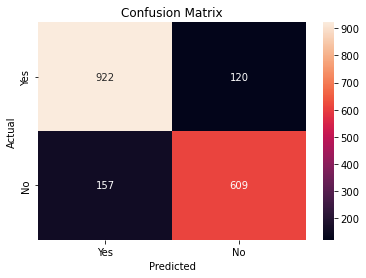



f1 score is :  0.8147157190635451


classification report 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1042
           1       0.84      0.80      0.81       766

    accuracy                           0.85      1808
   macro avg       0.84      0.84      0.84      1808
weighted avg       0.85      0.85      0.85      1808



At cv is 2 cv score is 75.46  
 test accuracy is 84.7 

At cv is 3 cv score is 82.04  
 test accuracy is 84.7 

At cv is 4 cv score is 82.14  
 test accuracy is 84.7 

At cv is 5 cv score is 82.88  
 test accuracy is 84.7 

At cv is 6 cv score is 82.85  
 test accuracy is 84.7 

At cv is 7 cv score is 83.15  
 test accuracy is 84.7 

At cv is 8 cv score is 83.25  
 test accuracy is 84.7 

At cv is 9 cv score is 83.38  
 test accuracy is 84.7 

At cv is 10 cv score is 83.4  
 test accuracy is 84.7 

At cv is 11 cv score is 83.58  
 test accuracy is 84.7 

At cv is 12 cv score is 83.63  
 test accuracy i

In [72]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_c,x4_train,x4_test,y4_train,y4_test)
print('\n')
score(grad_c,x4_train,x4_test,y4_train,y4_test)

In [73]:
from sklearn.ensemble import AdaBoostClassifier
adboost_c=AdaBoostClassifier()
R=max_aucroc_score(adboost_c,X,Y)

accuracy score corresponding to  0  is  82.35619469026548
accuracy score corresponding to  1  is  82.13495575221239
accuracy score corresponding to  2  is  81.85840707964603
accuracy score corresponding to  3  is  82.46681415929203
accuracy score corresponding to  4  is  84.4579646017699
accuracy score corresponding to  5  is  82.35619469026548
accuracy score corresponding to  6  is  83.79424778761062
accuracy score corresponding to  7  is  81.47123893805309
accuracy score corresponding to  8  is  82.85398230088495
accuracy score corresponding to  9  is  81.02876106194691
accuracy score corresponding to  10  is  83.4070796460177
accuracy score corresponding to  11  is  82.24557522123894
accuracy score corresponding to  12  is  82.24557522123894
accuracy score corresponding to  13  is  81.96902654867256
accuracy score corresponding to  14  is  81.85840707964603
accuracy score corresponding to  15  is  81.80309734513274
accuracy score corresponding to  16  is  82.79867256637168
accuracy 

test accuracy is 83.3
train accuracy is 82.7


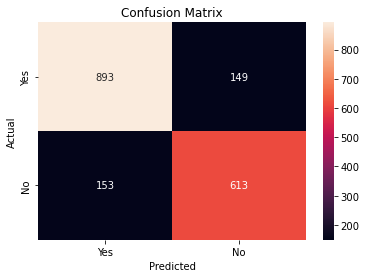



f1 score is :  0.8023560209424083


classification report 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1042
           1       0.80      0.80      0.80       766

    accuracy                           0.83      1808
   macro avg       0.83      0.83      0.83      1808
weighted avg       0.83      0.83      0.83      1808



At cv is 2 cv score is 74.63  
 test accuracy is 83.3 

At cv is 3 cv score is 80.92  
 test accuracy is 83.3 

At cv is 4 cv score is 80.8  
 test accuracy is 83.3 

At cv is 5 cv score is 81.75  
 test accuracy is 83.3 

At cv is 6 cv score is 81.73  
 test accuracy is 83.3 

At cv is 7 cv score is 82.04  
 test accuracy is 83.3 

At cv is 8 cv score is 82.13  
 test accuracy is 83.3 

At cv is 9 cv score is 81.89  
 test accuracy is 83.3 

At cv is 10 cv score is 82.24  
 test accuracy is 83.3 

At cv is 11 cv score is 82.24  
 test accuracy is 83.3 

At cv is 12 cv score is 82.16  
 test accuracy i

In [74]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_c,x5_train,x5_test,y5_train,y5_test)
print('\n')
score(adboost_c,x5_train,x5_test,y5_train,y5_test)

In [75]:
from sklearn.metrics import roc_curve,auc
area=[]
y_te=reg.predict(x1_test)
fpr1,tpr1,threshold1=roc_curve(y_te,y1_test)
roc_auc1= auc(fpr1, tpr1)
area.append(roc_auc1)
print("Area under the Decision Tree ROC curve : %f" % roc_auc1)

y_te=rf_c.predict(x2_test)
fpr2,tpr2,threshold2=roc_curve(y_te,y2_test)
roc_auc2= auc(fpr2, tpr2)
area.append(roc_auc2)
print("Area under the Random Forest ROC curve : %f" % roc_auc2)

y_te=kc.predict(x3_test)
fpr3,tpr3,threshold3=roc_curve(y_te,y3_test)
roc_auc3= auc(fpr3, tpr3)
area.append(roc_auc3)
print("Area under the KNN ROC curve : %f" % roc_auc3)


y_te=grad_c.predict(x4_test)
fpr4,tpr4,threshold4=roc_curve(y_te,y4_test)
roc_auc4= auc(fpr4, tpr4)
area.append(roc_auc4)
print("Area under the Grad boost ROC curve : %f" % roc_auc4)

y_te=adboost_c.predict(x5_test)
fpr5,tpr5,threshold5=roc_curve(y_te,y5_test)
roc_auc5= auc(fpr5, tpr5)
area.append(roc_auc5)
print("Area under the ada boost ROC curve : %f" % roc_auc5)

Area under the Decision Tree ROC curve : 0.778001
Area under the Random Forest ROC curve : 0.842574
Area under the KNN ROC curve : 0.780088
Area under the Grad boost ROC curve : 0.844943
Area under the ada boost ROC curve : 0.829095


#### Creating Table to store datas

In [76]:
aa=['DT','RF','KNN','GRAD','adaboost']

In [77]:

kk=pd.DataFrame({'test accuracy':A,'max_cv_score': B,'diff':D,'mse':C,'mae':mae,'F1 score':E,'roc_curve_area':area},index=aa)
kk.sort_values(by=['diff','test accuracy', 'mse', 'mae' ])

,test accuracy,max_cv_score,diff,mse,mae,F1 score,roc_curve_area
DT,78.2,78.380325,0.058920,0.218473,0.218473,0.744997,0.778001
KNN,77.4,78.853946,0.203445,0.225664,0.225664,0.764434,0.780088
adaboost,83.3,82.474620,0.825380,0.167035,0.167035,0.802356,0.829095
RF,84.5,83.645999,0.854001,0.154867,0.154867,0.813333,0.842574
GRAD,84.7,83.750836,0.949164,0.153208,0.153208,0.814716,0.844943


#### Inference

- gradient boosting classifier is the best model
    - highest roc_curve area
    - highest F1 score
    - least error compared to other models
    - highest test accuracy
    - highest cv_score


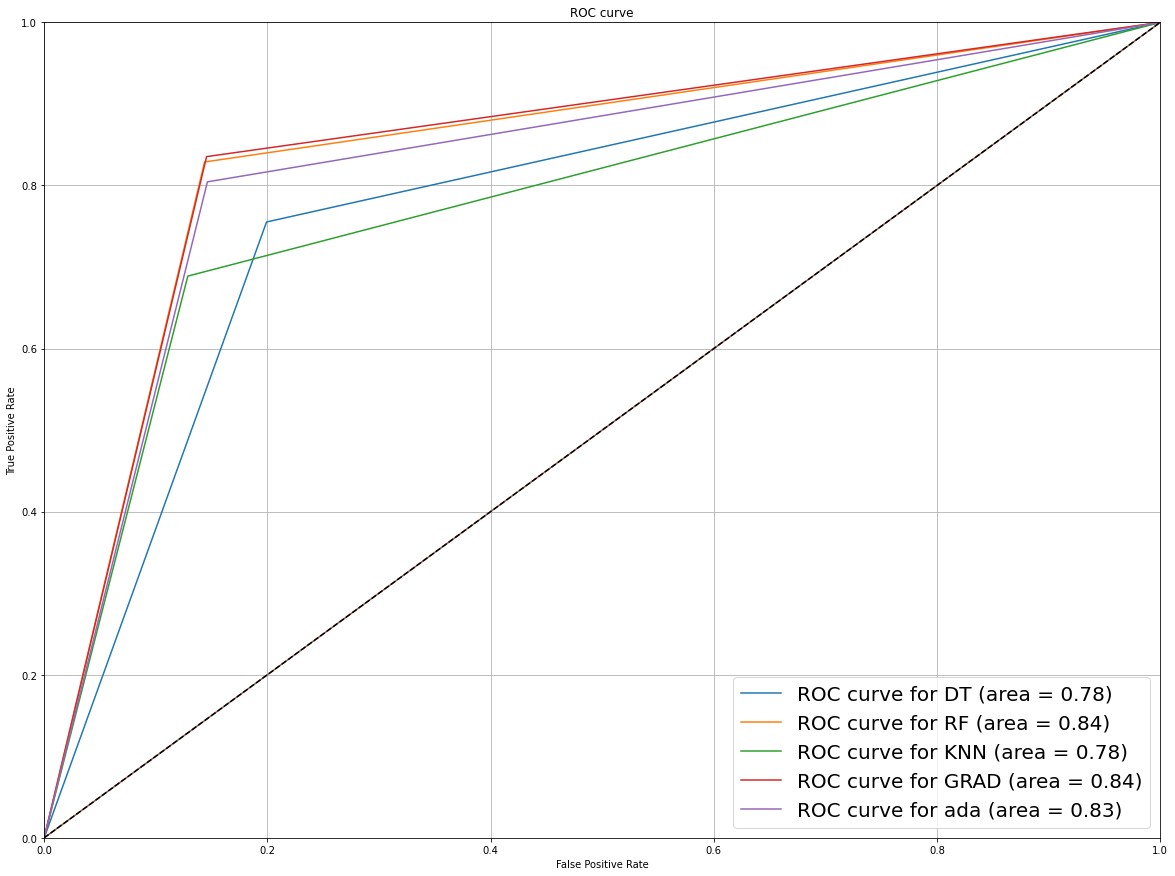

In [78]:
plt.figure(figsize = (20,15))

plt.plot(fpr1, tpr1, label = 'ROC curve for DT (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label = 'ROC curve for RF (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label = 'ROC curve for KNN (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label = 'ROC curve for GRAD (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label = 'ROC curve for ada (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], [0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)
plt.show()

#### Hyper paramter tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [104]:
par={'loss':['log_loss', 'deviance', 'exponential'],
     'learning_rate':[0.02,0.025,0.03,0.035,0.04],
     'criterion':['friedman_mse','mse'],
     'n_estimators':[300,350,400,450,500],
     'max_features' : ['auto', 'sqrt', 'log2']
}

In [105]:
grid=GridSearchCV(grad_c,par,cv=2)
grid.fit(x4_train,y4_train)
grid.best_params_  

{'criterion': 'friedman_mse',
 'learning_rate': 0.035,
 'loss': 'exponential',
 'max_features': 'auto',
 'n_estimators': 300}

In [106]:
grad=GradientBoostingClassifier( criterion= 'friedman_mse', learning_rate= 0.035, loss= 'exponential', max_features= 'auto', n_estimators= 300)
grad.fit(x4_train,y4_train)
y_te=grad.predict(x4_test)
aucroc_scr=round((accuracy_score(y4_test,y_te))*100,2)
print(aucroc_scr)

84.79


In [107]:
cv_score=cross_val_score(grad,X,Y,cv=17)
cv_mean=round(cv_score.mean()*100,2)
print(cv_mean)

83.65


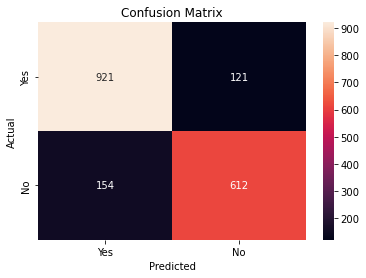

In [108]:
cm = confusion_matrix(y4_test, y_te)
class_label = ["Yes", "No"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print('\n')

#### Storing model and loading it

In [109]:
import pickle

In [110]:
filename='Customer_Churn_Analysis.pkl'
pickle.dump(grad,open(filename,'wb'))

In [112]:
l_m=pickle.load(open('Customer_Churn_Analysis.pkl','rb'))
re=l_m.score(x4_test,y4_test)
print(re*100)

84.78982300884957
